## Neural Networks

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Google drive link
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Defining the google drive file paths for the training and testing datasets
x_train_path = '/content/drive/My Drive/Colab Notebooks/Files_2/X_train.csv'
y_train_path = '/content/drive/My Drive/Colab Notebooks/Files_2/Y_train.csv'
x_test_path = '/content/drive/My Drive/Colab Notebooks/Files_2/X_test.csv'
y_test_path = '/content/drive/My Drive/Colab Notebooks/Files_2/Y_test.csv'

# Loading the training and testing datasets
x_train = np.loadtxt(x_train_path)
y_train = np.loadtxt(y_train_path)
x_test = np.loadtxt(x_test_path)
y_test = np.loadtxt(y_test_path)

In [77]:
# Activation function
def sigmoid(x):
  return 1/(1 + (np.exp(-x)))

def sigmoid_derivative(x):
  return sigmoid(x) * (1-sigmoid(x))

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
  return 1 - (tanh(x)**2)

def linear(x):
  return x

In [53]:
# Initial parameters
# First layer
n = 10 # number of neurons
w1 = np.random.rand(n,2)
b1 = np.random.rand(n,100)

# Second layer
w2 = np.random.rand(1,n)
b2 = np.random.rand(1,100)

In [54]:
# First forward pass
z1 = np.dot(w1,x_train.T) + b1
a1 = sigmoid(z1)
#a1 = z1

z2 = np.dot(w2,a1) + b2
#a2 = sigmoid(z2)
a2 = z2

In [22]:
# Backprop method

def backprop(w1, w2, b1, b2, iter, learn_rate):
  mse_losses = []
  mse_losses.clear()
  # Computing gradients
  for i in range(iter):
    # Computing gradients
    dz2 = (a2 - y_train)
    dw2 = np.dot(dz2, a1.T)
    db2 = dz2
    dz1 = np.dot(w2.T,dz2) * sigmoid(z1) * (1-sigmoid(z1))
    #dz1 = np.dot(w2.T,dz2)
    dw1 = np.dot(dz1, x_train)
    db1 = dz1

    alpha = learn_rate
    # Updating weights
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2

    # Second forward pass with new weights
    z1_new = np.dot(w1,x_train.T) + b1
    a1_new = sigmoid(z1_new)
    #a1_new = z1_new

    z2_new = np.dot(w2,a1_new) + b2
    #a2_new = sigmoid(z2_new)
    a2_new = z2_new
    mse_losses.append(mse(a2_new,y_train))
    print(a2_new, a2)
  return mse_losses, a2_new  

#a2_new = backprop(w1, w2, b1, b2)

2.1. What is the activation function that you will choose for the output layer? Justify your answer briefly. 

Answer: The activation function used here is just the identity function as it is a regression model.  

2.2. How many neurons should there be in the output layer? Why? 

Answer: Just one neuron would be required as there are no classes per se present in the dataset. It's just a collection of data points.

2.3. Report the average MSE loss and the accuracy.

Answer: The mse loss using seven neurons is 3416.4526306825255

2.4. Plot the loss and accuracy as a function of the number of iterations.

Answer: Plotted below

2.5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

Answer: Plotted below. As the learning rate increased from 0.001 to 1.0, the MSE loss increased as shown in the plot. 

2.6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?

Answer: Increasing the number of neurons in a layer helps in extracting more features from the input dataset. This should help in decreasing the MSE loss of the model. The update rule does not need to be changed as all the neurons are reflected in the weight matrix. After experimenting with the number of neurons, I found that using 10 neurons in the hidden layer gave the minima for the mse losses. (MSE loss = 3347.871900376043)

b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

Answer: The final loss is 3347.871900376043 with 10 neurons. I think the activation function sigmoid in the hidden layer cut short the predicted values as compared to the true labels. Other than than, the predicted labels is pretty much capturing the essence of the true labels.

2.7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.

a. Will you need to change the update rule?
Answer: The derivatives of the activation function are different. The update rule needs to reflect the new derivative of the new activation function.

b. What is the change that you need to make to achieve this experiment?
Answer: Just have to the change the activation function of the hidden layer and update the update rules with the new activation function's derivative.

c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

In [17]:
# MSE loss

def mse(actual, predict):
  return np.square(np.subtract(actual, predict)).mean()

# n = len(y_train)
# sum = 0

# for i in range(n):
  # diff = y_train - a2_new
  # diff_sq = diff ** 2
  # sum = sum + diff_sq

# MSE = sum/n

# mse_loss = mse(y_train, a2_new)
# print("The MSE loss is: ", mse_loss)

In [ ]:
losses = []
losses = backprop(w1, w2, b1, b2, 100, 0.0001)

In [ ]:
losses

In [61]:
iterations = range(1,101)

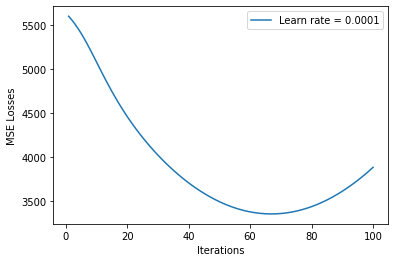

In [ ]:
# 2.4 Plot
plt.plot(iterations,losses, label = 'Learn rate = 0.0001')
plt.legend(loc="upper right")
plt.xlabel("Iterations")
plt.ylabel("MSE Losses")
plt.show()

In [ ]:
# 2.5 Plot
loss_1 = []
# Do first forward pass above then backprop
loss_1 = backprop(w1, w2, b1, b2, 100, 0.001)



In [ ]:
loss_2 = []
# Do first forward pass above then backprop
loss_2 = backprop(w1, w2, b1, b2, 100, 1)

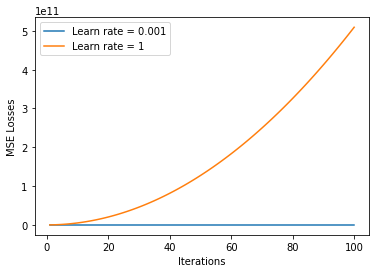

In [ ]:
plt.plot(iterations,loss_1, label = 'Learn rate = 0.001')
plt.plot(iterations,loss_2, label = 'Learn rate = 1')
plt.legend(loc = "upper left")
plt.xlabel("Iterations")
plt.ylabel("MSE Losses")
plt.show()

In [ ]:
# 2.6.a
# With ten neurons
new_losses, predicted = backprop(w1, w2, b1, b2, 100, 0.0001)

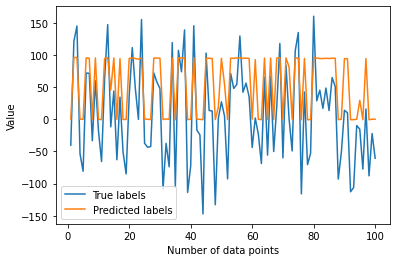

In [66]:
plt.plot(iterations, y_train, label = 'True labels')
plt.plot(iterations, predicted.T, label = 'Predicted labels')
plt.legend(loc = "lower left")
plt.xlabel("Number of data points (n)")
plt.ylabel("Value")
plt.show()

In [ ]:
# 2.7 tanh activation function

In [68]:
# Initial parameters
# First layer
n = 10 # number of neurons
w1 = np.random.rand(n,2)
b1 = np.random.rand(n,100)

# Second layer
w2 = np.random.rand(1,n)
b2 = np.random.rand(1,100)

In [69]:
# First forward pass
z1 = np.dot(w1,x_train.T) + b1
a1 = tanh(z1)
#a1 = z1

z2 = np.dot(w2,a1) + b2
#a2 = sigmoid(z2)
a2 = z2

In [70]:
# Backprop method

def backprop(w1, w2, b1, b2, iter, learn_rate):
  mse_losses = []
  mse_losses.clear()
  # Computing gradients
  for i in range(iter):
    # Computing gradients
    dz2 = (a2 - y_train)
    dw2 = np.dot(dz2, a1.T)
    db2 = dz2
    dz1 = np.dot(w2.T,dz2) * tanh_derivative(z1)
    #dz1 = np.dot(w2.T,dz2)
    dw1 = np.dot(dz1, x_train)
    db1 = dz1

    alpha = learn_rate
    # Updating weights
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2

    # Second forward pass with new weights
    z1_new = np.dot(w1,x_train.T) + b1
    a1_new = sigmoid(z1_new)
    #a1_new = z1_new

    z2_new = np.dot(w2,a1_new) + b2
    #a2_new = sigmoid(z2_new)
    a2_new = z2_new
    mse_losses.append(mse(a2_new,y_train))
    print(a2_new, a2)
  return mse_losses, a2_new  

#a2_new = backprop(w1, w2, b1, b2)

In [ ]:
new_losses_tanh, predicted_tanh = backprop(w1, w2, b1, b2, 100, 0.0001)

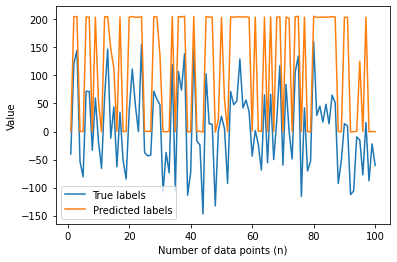

In [76]:
plt.plot(iterations, y_train, label = 'True labels')
plt.plot(iterations, predicted_tanh.T, label = 'Predicted labels')
plt.legend(loc = "lower left")
plt.xlabel("Number of data points (n)")
plt.ylabel("Value")
plt.show()

tanh activation function has increased the deviation of the predicted labels from the true labels as it has the entire negative spectrum too in its definitionl

In [ ]:
# Linear activation function

In [78]:
# Initial parameters
# First layer
n = 10 # number of neurons
w1 = np.random.rand(n,2)
b1 = np.random.rand(n,100)

# Second layer
w2 = np.random.rand(1,n)
b2 = np.random.rand(1,100)

In [79]:
# First forward pass
z1 = np.dot(w1,x_train.T) + b1
a1 = linear(z1)
#a1 = z1

z2 = np.dot(w2,a1) + b2
#a2 = sigmoid(z2)
a2 = z2

In [80]:
# Backprop method

def backprop(w1, w2, b1, b2, iter, learn_rate):
  mse_losses = []
  mse_losses.clear()
  # Computing gradients
  for i in range(iter):
    # Computing gradients
    dz2 = (a2 - y_train)
    dw2 = np.dot(dz2, a1.T)
    db2 = dz2
    dz1 = np.dot(w2.T,dz2) * 1
    #dz1 = np.dot(w2.T,dz2)
    dw1 = np.dot(dz1, x_train)
    db1 = dz1

    alpha = learn_rate
    # Updating weights
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2

    # Second forward pass with new weights
    z1_new = np.dot(w1,x_train.T) + b1
    a1_new = sigmoid(z1_new)
    #a1_new = z1_new

    z2_new = np.dot(w2,a1_new) + b2
    #a2_new = sigmoid(z2_new)
    a2_new = z2_new
    mse_losses.append(mse(a2_new,y_train))
    print(a2_new, a2)
  return mse_losses, a2_new  

#a2_new = backprop(w1, w2, b1, b2)

In [ ]:
new_losses_linear, predicted_linear = backprop(w1, w2, b1, b2, 100, 0.0001)

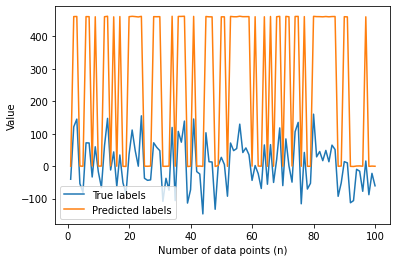

In [84]:
plt.plot(iterations, y_train, label = 'True labels')
plt.plot(iterations, predicted_linear.T, label = 'Predicted labels')
plt.legend(loc = "lower left")
plt.xlabel("Number of data points (n)")
plt.ylabel("Value")
plt.show()

The linear activatoin funciton has the highest deivation of the predicted values from the true labels in my experiments. This proves that it is not a good activation function for these datasets.